## KDE plots

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, interact_manual, interactive_output, fixed, widgets

In [2]:
cars = sns.load_dataset('mpg').dropna()
cars.shape

(392, 9)

In [3]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Univariate 1D | probability density fn

In [5]:
with plt.style.context('ggplot'):
    
    sns.kdeplot(data=cars, x='horsepower')

<img src='./plots/kde-plot-1.png'>

### shade

In [6]:
with plt.style.context('ggplot'):
    
    sns.kdeplot(data=cars, x='horsepower', fill=True)

<img src='./plots/kde-plot-2.png'>

### bandwidth

In [10]:
with plt.style.context('ggplot'):
    
    sns.kdeplot(data=cars, x='horsepower', fill=True, bw_adjust=0.5 );
plt.show()

<img src='./plots/kde-plot-3.png'>

In [26]:
def bandwidth_adjust(bw=(0.0,1.0)):
    with plt.style.context('ggplot'):
        sns.kdeplot(data=cars, x='horsepower', fill=True, bw_adjust=bw)


interact(bandwidth_adjust)

interactive(children=(FloatSlider(value=0.5, description='bw', max=1.0), Output()), _dom_classes=('widget-inte…

<function __main__.bandwidth_adjust(bw=(0.0, 1.0))>

### Cumulative distribution function instead of probability density function

In [4]:
with plt.style.context('fivethirtyeight'):
    sns.kdeplot(cars.horsepower, cumulative=True);
plt.show()

<img src='./plots/kde-plot-4.png'>

## Bivaraite | Joint probabilty density function

In [8]:
with plt.style.context("ggplot"):
    sns.kdeplot(data=cars, x='horsepower', y='mpg');
plt.show();

<img src='./plots/kde-plot-5.png'>

### more rings

In [10]:
with plt.style.context("ggplot"):
    sns.kdeplot(data=cars, x='horsepower', y='mpg', levels=18);
plt.show()

<img src='./plots//kde-plot-6.png'>

In [13]:
@interact
def bivariate(l=(5, 20, 1)):
    with plt.style.context("ggplot"):
        sns.kdeplot(data=cars, x='horsepower', y='mpg', levels=l);
        plt.show();

interactive(children=(IntSlider(value=12, description='l', max=20, min=5), Output()), _dom_classes=('widget-in…

### Shade

In [16]:
with plt.style.context("fivethirtyeight"):
    sns.kdeplot(data=cars, x='horsepower', y='mpg', levels=10, fill=True);
plt.show();

<img src='./plots/kde-plot-7.png'>

In [19]:
@interact
def bivariate(l=(5, 20, 1)):
    with plt.style.context("fivethirtyeight"):
        sns.kdeplot(data=cars, x='horsepower', y='mpg', levels=l, fill=True);
    plt.show();

interactive(children=(IntSlider(value=12, description='l', max=20, min=5), Output()), _dom_classes=('widget-in…

### Color bar

In [23]:
with plt.style.context("fivethirtyeight"):
    sns.kdeplot(data=cars, x='horsepower', y='mpg', levels=10, fill=True, cbar=True);
plt.tight_layout()
plt.show();

<img src='./plots/kde-plot-8.png'>

### Lets check the probabilty density of variable cylinders

In [25]:
with plt.style.context("fivethirtyeight"):
    sns.kdeplot(data=cars, x='cylinders', levels=10, fill=True, cbar=True);
plt.show();

<img src='./plots/kde-plot-9.png'>

### If you have categories in your data then you can do more

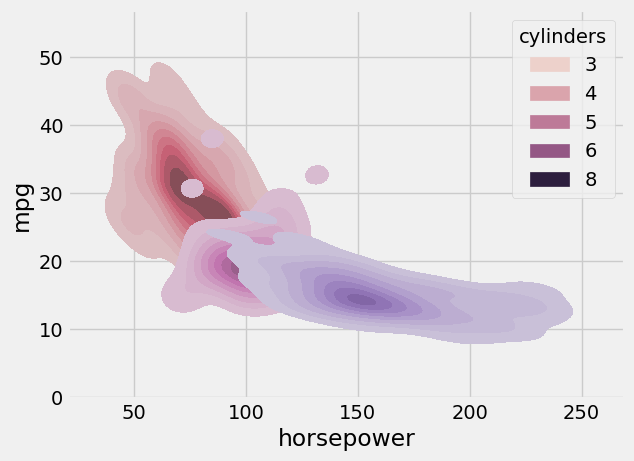

In [27]:
with plt.style.context("fivethirtyeight"):
    sns.kdeplot(data=cars, x='horsepower', y='mpg', hue='cylinders', levels=10, fill=True);
plt.show()

### Here we can notice that 4 cyclinder and 8 cyclinder cars have different density pattern in terms of MPG and horsepower

In [30]:
with plt.style.context("ggplot"):
    sns.kdeplot(
        data=cars.query('cylinders in (4, 8)'), 
        x='horsepower', y='mpg', hue='cylinders', levels=10, fill=True);
    plt.show();

<img src='./plots/kde-plot-11.png'>

In [32]:
@interact
def cyclinders(cylinders = [3,4,5,6,8]):
    with plt.style.context("ggplot"):
        sns.kdeplot(
            data=cars.query(f'cylinders == {cylinders}'), 
            x='horsepower', y='mpg', hue='cylinders', levels=10, fill=True);
        plt.show()

interactive(children=(Dropdown(description='cylinders', options=(3, 4, 5, 6, 8), value=3), Output()), _dom_cla…